# Seaborn

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Функция, рисующая несколько траекторий синусов

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

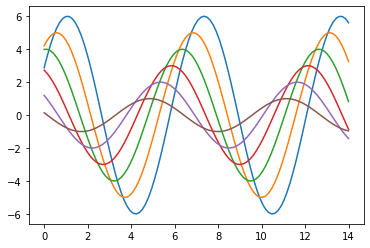

In [3]:
sinplot()

## 1. Стили

Установка эстетических параметров графиков:

`sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)`

* `context` -- параметры контекста, влияет на размер меток, линий и других элементов, но не на общий стиль. Контекст: `notebook`, `paper`, `talk`, `poster`;
* `style` -- стиль осей: `darkgrid` (серый фон с сеткой), `whitegrid` (белый фон с сеткой), `dark` (серый фон без сетки), `white`  (белый фон без сетки), `ticks`;
* `palette` -- цветовая палитра: `deep`, `muted`, `bright`, `pastel`, `dark`, `colorblind`, а так же палитры из `matplotlib`;
* `font` -- шрифт текста;
* `font_scale` -- масштабирование размера текста.

Посмотрим вид графиков для разных контекстов:

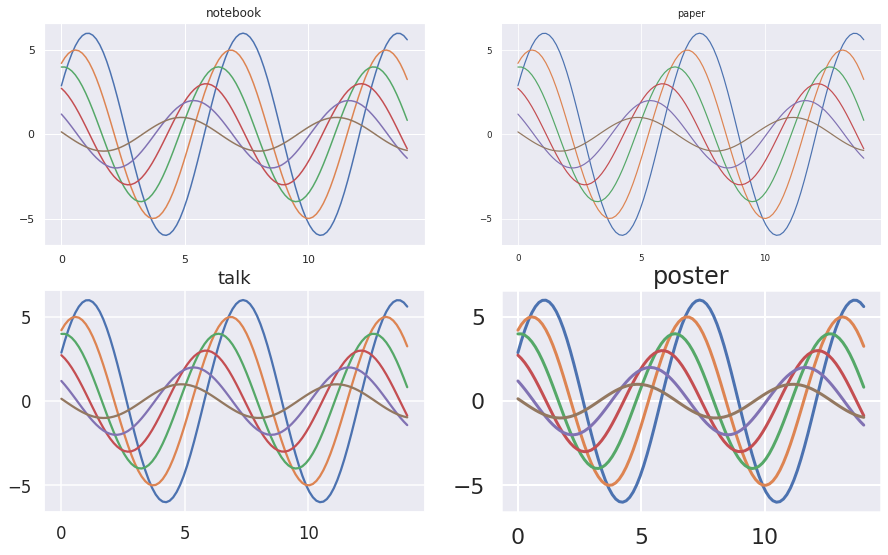

In [4]:
plt.figure(figsize=(15, 9))
for i, context in enumerate(['notebook', 'paper', 
                             'talk', 'poster']):
    sns.set(context=context)
    plt.subplot(2, 2, i+1)
    sinplot()
    plt.title(context)

Вид графиков в разных стилях

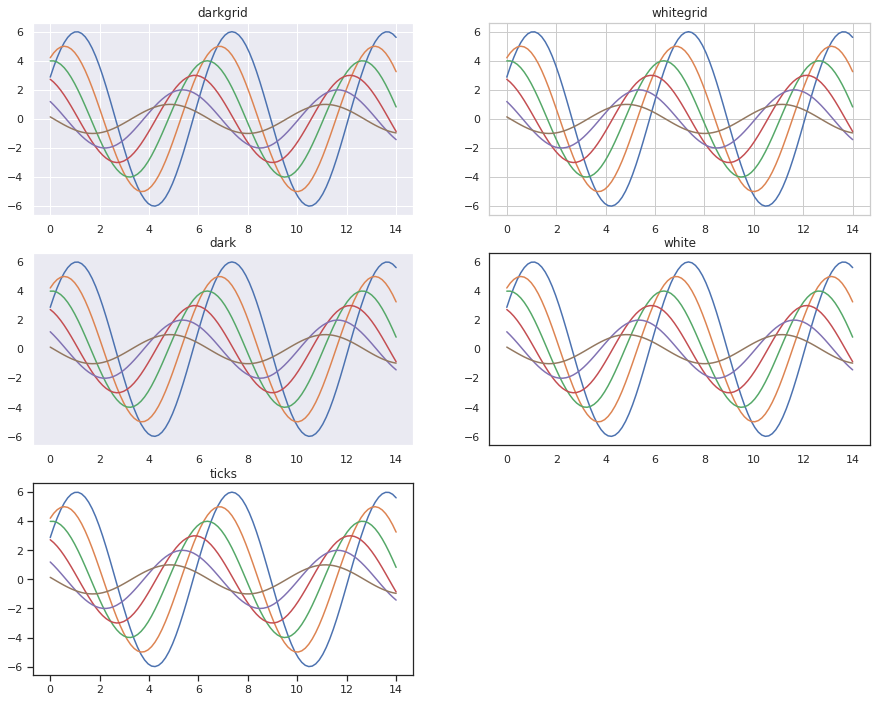

In [63]:
plt.figure(figsize=(15, 12))
for i, style in enumerate(['darkgrid', 'whitegrid', 
                           'dark', 'white', 'ticks']):
    sns.set(style=style)
    plt.subplot(3, 2, i+1)
    sinplot()
    plt.title(style)

Используемую палитру можно визуализировать

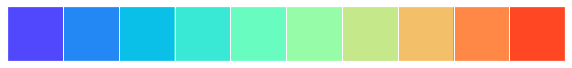

In [45]:
sns.palplot(sns.color_palette('rainbow', n_colors=10))

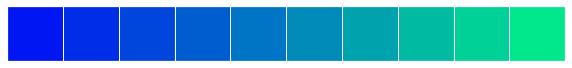

In [7]:
sns.palplot(sns.color_palette('winter', n_colors=10))

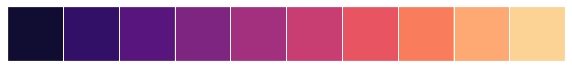

In [8]:
sns.palplot(sns.color_palette('magma', n_colors=10))

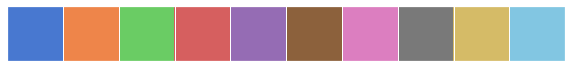

In [9]:
sns.palplot(sns.color_palette('muted', n_colors=10))

Для примера нарисуем радугу с помощью группы линий

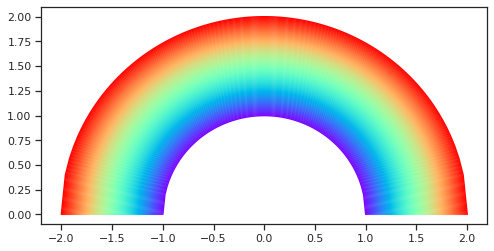

In [68]:
count = 100
colors = sns.color_palette('rainbow', count)
layers = np.linspace(1, 2, count)

plt.figure(figsize=(8, 4))
for i in np.arange(count):
    grid = np.linspace(-layers[i], layers[i], 100)
    y = np.sqrt(layers[i]**2 - grid**2)
    plt.plot(grid, y, c=np.array(colors[i]))

Способ убрать границы с графиков, что невозможно в matplotlib

`sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)`
* `fig` -- фигура `matplotlib`. Если `None`, то текущая;
* `top`, `right`, `left`, `bottom` -- указатели границ

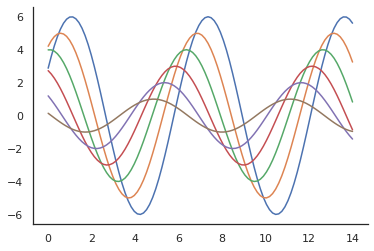

In [71]:
sns.set(style='white')
sinplot()
sns.despine()

## 2. Оценки плотности

Пусть $X = (X_1, ..., X_n)$ --- выборка из непрерывного распределения. 
Выберем
* $q(x)$ --- некоторая "базовая" плотность, называемая **ядром**. Чаще всего в качестве ядра рассматривают плотность нормального распределения $\mathcal{N}(0, I_n)$. 
* $h > 0$ --- величина, отвечающая за масштабирование ядра, называемая **шириной ядра**.

Тогда **ядерной оценкой плотности** (kernel density estimation, KDE) по выборке $X$ называется плотность
$$\widehat{p}_h(x) = \frac{1}{nh}\sum_{i=1}^n q\left(\frac{x-X_i}{h}\right)$$

**Смысл:** в каждую точку выборки поставили отмасштабированное ядро и усреднили.

*Замечание*. KDE будет на лекции через неделю.

--------------------

### 2.1 `sns.kdeplot`

Построение и отрисовка KDE (в 1D или 2D):

`sns.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)`

* `data` -- выборка;
* `data2` -- вторая координата в двумерном случае;
* `shade` -- закрашивать ли области. В 1D закрашивает область под графиком, в 2D закрашивает области между линиями уровня;
* `vertical` -- повернуть график;
* `kernel` -- метка ядра. В 1D доступны `gau`, `cos`, `biw`, `epa`, `tri`, `triw`; в 2D только гауссовское;
* `bw` -- ширина ядра. Можно указать `scott`, `silverman` или число. В 2D можно указать пару чисел.
* `gridsize` -- размер сетки для отрисовки графика. Влияет только на точность отрисовки, а не на точность оценки плотности;
* `cut` -- задает границы отрисовки kde: график будет нарисован на величину cut * bw от крайних точек выборки
* `clip` -- нижняя и верхняя граница точек, по которым строится kde. Параметр имеет вид `(low, high)` в 1D и `((low_x, high_x), (low_y, high_y))` в 2D;
* `legend` -- отрисовка легенды;
* `cumulative` -- если `True`, то рисует функцию распределения, соответствующую построенной KDE;
* `shade_lowest` -- нужно ли закрашивать последний контур для 2D. Флаг `False` может быть полезен при отрисовке нескольких kde на одном графике
* `cbar` -- в 2D добавляет colorbar (шкала цветов);
* `cbar_kws` -- аргументы, соответствующие `fig.colorbar`;
* `kwargs` -- другие аргументы, соответствующие `plt.plot` или `plt.contour`. Например, `color` -- цвет, `cmap` -- цветовая схема, `n_levels` -- количество линий уровня.

### 2.2 `sns.distplot`

Гибко настраиваемый график оценки одномерного распределения по выборке.
Совмещает возможности функций `plt.hist`, `sns.kdeplot`, `sns.rugplot` и функций `fit` из `scipy.stats`.

`sns.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)`

* `a` -- выборка;
* `bins` -- число бинов гистограммы. Если `None`, то выставляется по правилу Freedman-Diaconis;
* `hist` -- рисовать ли гистограмму;
* `kde` -- рисовать ли kde;
* `rug` -- рисовать ли точки выборки в виде штрихов;
* `hist_kws`, `kde_kws`, `rug_kws` -- параметры гистограммы, kde и rugplot в виде словарей
* `fit` -- семейство распредений. Объект должен иметь метод `fit`, который вернет ОМП в виде `tuple`, и метод `pdf`, который по сетке посчитает плотность распределения с параметрами, соответствующими ОПМ. Например, подойдет распределение из `scipy.stats`. Если параметр указан, что будет нарисована плотность, соответствующая ОМП в данном классе;
* `color` -- цвет;
* `vertical` -- повернуть график;
* `norm_hist` -- нормировать ли гистограмму.

------------------

Пример `distplot` для всех четырех типов графиков для выборки из нормального распределения. В качестве параметрического семейства распределений использованы все нормальные распределения. Плотность, соответствующая ОМП, нарисована черным цветом.

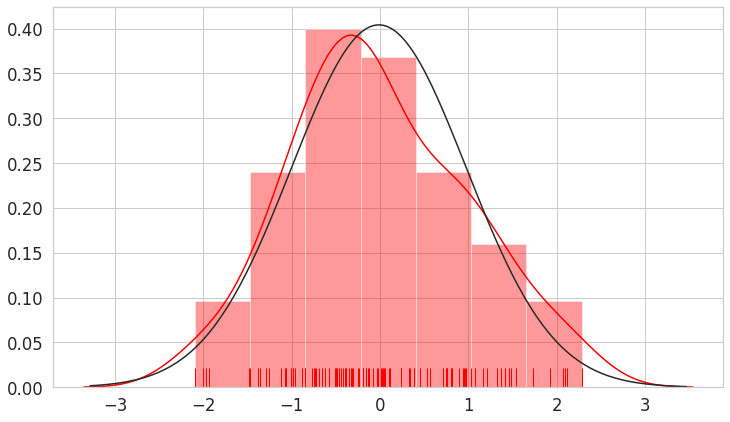

In [85]:
sns.set(style='whitegrid', font_scale=1.5)

x = sps.norm.rvs(size=100)
plt.figure(figsize=(12, 7))
sns.distplot(x, rug=True, fit=sps.norm, color='red');

Многомерная оценка плотности

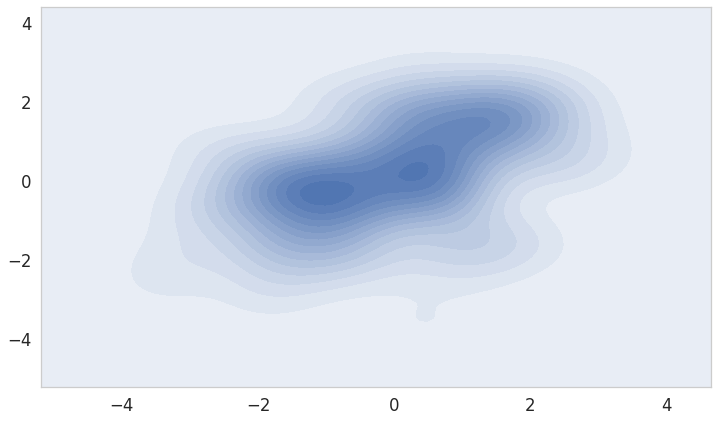

In [86]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=100).T

plt.figure(figsize=(12, 7))
sns.kdeplot(x, y, n_levels=15, shade=True);

Загрузим датасет Ирисы Фишера, который встроен в seaborn. Числовые столбцы отвечают за длину и ширину наружной и внутренней доли околоцветника для трех сортов ириса: setosa, virginica, versicolor.

In [114]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Выберем два сорта

In [118]:
setosa = iris.loc[iris.species == 'setosa']
virginica = iris.loc[iris.species == 'virginica']

Построим для них ядерную оценку плотности

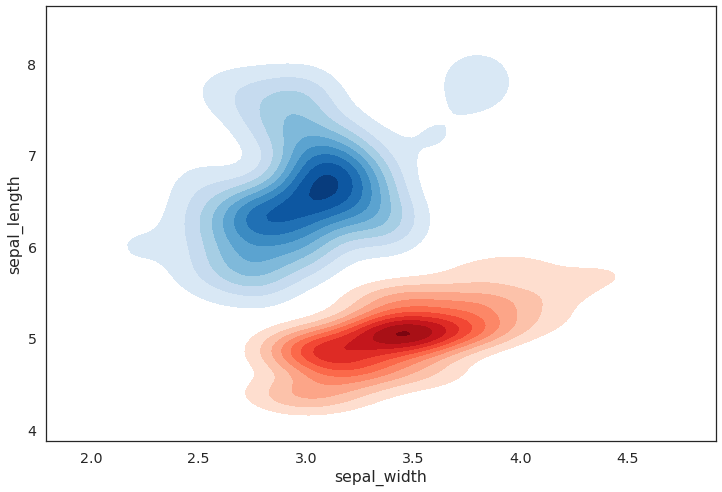

In [119]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length, 
                 cmap='Reds', shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length, 
                 cmap='Blues', shade=True, shade_lowest=False)

## 3. Box plot 
Box plot --- график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

`seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)`

* `x`, `y`, `hue` -- одномерные данные или имена переменных из `data`. Параметр `hue` отвечает за категории данных;
* `data` -- данные;
* `orient`: `"v"` | `"h"` -- ориентация (вертикальная или горизонтальая);
* `color` и `palette` -- задают цвет.

-------------

Простой пример:

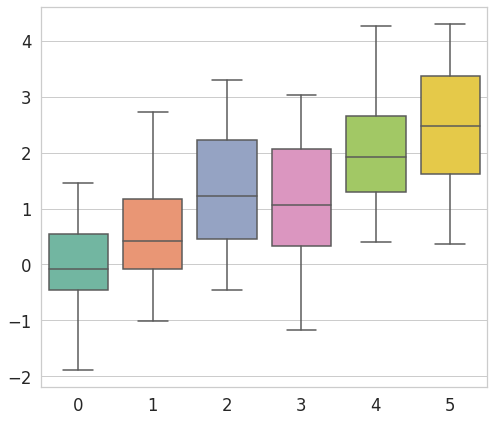

In [93]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 7))
sns.boxplot(data=data, palette='Set2');

Загрузим датасет `tips`, встроен в seaborn. Изначально датасет составлен официантом, который записывал информацию о каждых чаевых, который он получал в течение нескольких месяцев работы в ресторане. Имена переменных:
* `total_bill` -- общая сумма счета;
* `tip` -- сумма чаевых;
* `sex` -- пол клиента;
* `smoker` -- курящий ли клиент;
* `day` -- день недели (официант работал не все дни);
* `time` -- время дня;
* `size` -- количество людей в компании клиента.

In [94]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

С помощью box plot визуализируем зависимость общей суммы счета от дня недели.

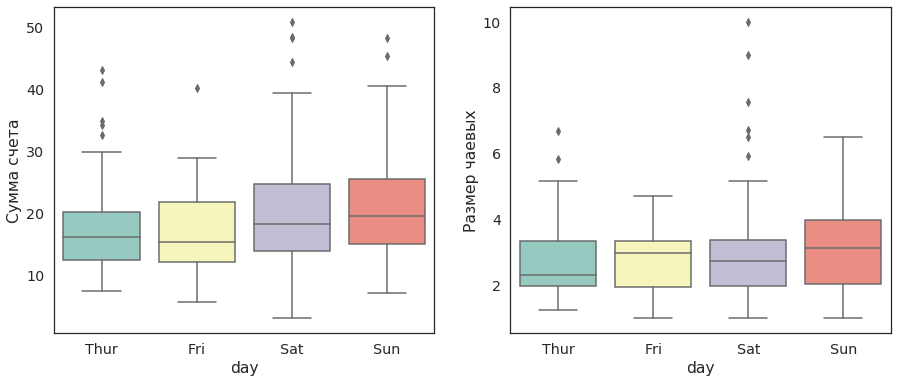

In [111]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set3')
plt.ylabel('Сумма счета')

plt.subplot(122)
sns.boxplot(x='day', y='tip', data=tips, palette='Set3')
plt.ylabel('Размер чаевых');

Посмотрим на ту же зависимость отдельно по двум группам, определяемых столбцом `smoker`, который передадим в аргумент `hue`. Для удобства сравнения результата между группами, их ящики рисуются рядом.

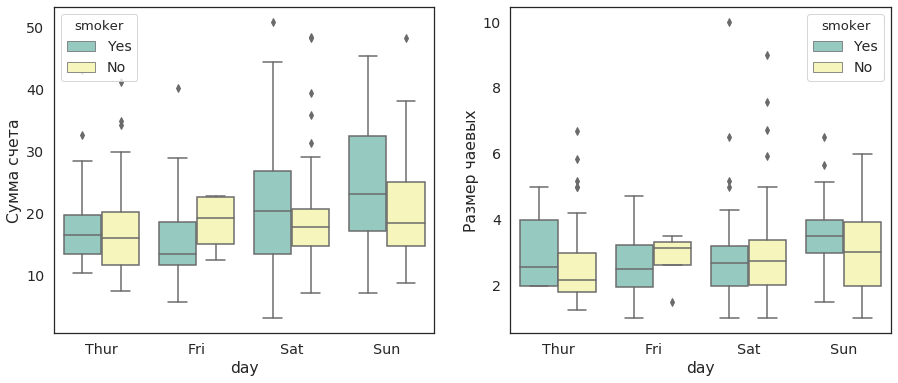

In [112]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.boxplot(x='day', y='total_bill', hue='smoker', 
            data=tips, palette='Set3')
plt.ylabel('Сумма счета')

plt.subplot(122)
sns.boxplot(x='day', y='tip', hue='smoker', 
            data=tips, palette='Set3')
plt.ylabel('Размер чаевых');

## Отступление

Сравните два графика. Какой выглядит лучше?

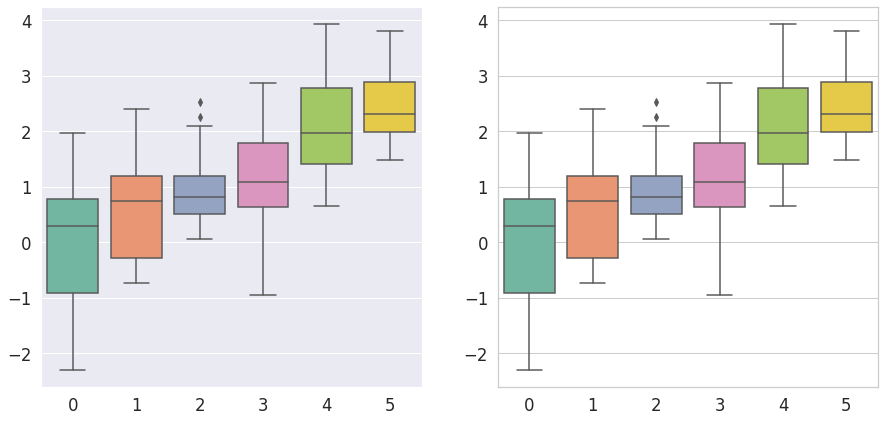

In [98]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

plt.figure(figsize=(15, 7))
sns.set(font_scale=1.5)
plt.subplot(121)
sns.boxplot(data=data, palette='Set2')
sns.set_style(style='whitegrid')
plt.subplot(122)
sns.boxplot(data=data, palette='Set2');

А из этих? В предположении, что необходима сетка, которая помогает при необходимости извлечения количественной информации из графика.

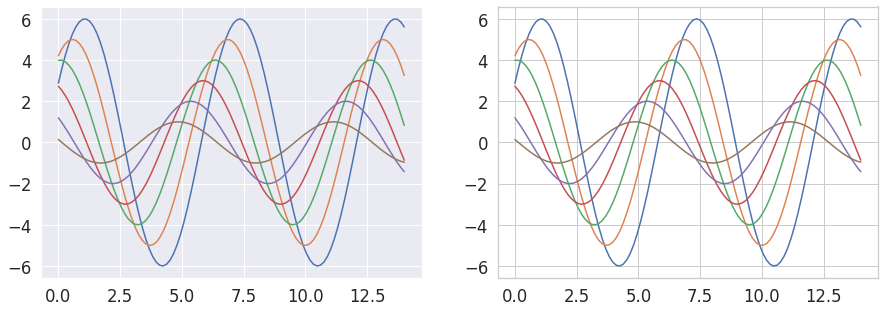

In [122]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

plt.figure(figsize=(15, 5))
sns.set(font_scale=1.5)
plt.subplot(121)
sinplot()
sns.set_style(style='whitegrid')
plt.subplot(122)
sinplot()

-------------

* Тему `darkgrid` стоит применять для "легких" графиков (точки, линии), поскольку белый цвет сетки на сером фоне помогает избежать конкуренции сетки с линиями, представляющими данные. 
* Тема `whitegrid` похожа, но лучше подходит для графиков с "тяжелыми элементами" (например, закрашенные области).

-------------

## 4. Violin plot

Некоторая комбинация boxplot и ядерной оценки плотности. Внутри облака изображен обычный ящик с усами, только в сжатом виде и без выбросов. Форма облака соответствует ядерной оценке плотности.

`sns.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)`

* `x`, `y`, `hue` -- одномерные данные или имена переменных из `data`;
* `data` -- данные;
* `bw` -- ширина ядра;
* `gridsize` -- размер сетки для отрисовки ядерной оценки плотности;
* `orient`: `"v"` | `"h"` -- ориентация (вертикальная или горизонтальая);
* `color` и `palette` -- задают цвет.

------------------

Простой пример

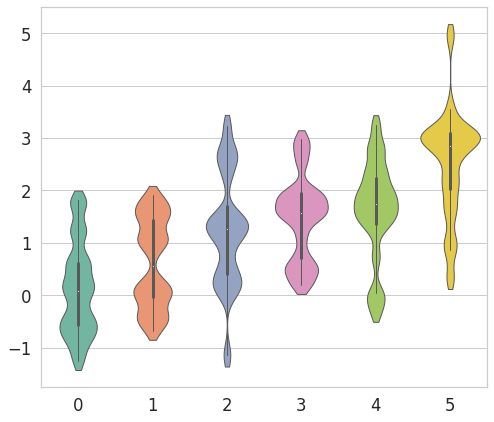

In [123]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 7))
sns.violinplot(data=data, palette='Set2', bw=.2, cut=1, linewidth=1);

## 5. PairGrid

Сетка графиков для визуализации попарных отношений в данных.

`class sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)`

* `data` -- данные;
* `hue` -- категории, которые будут закрашиваться в разные цвета;
* `palette` -- цветовая схема, может быть задана в виде словаря цветов;
* `height` -- высота каждой грани (в дюймах).

Возвращает объект, у которого доступны перечисленные ниже функции. В эти функции нужно передать функцию `func`, с помощью которой будет построен график по паре переменных (или по одной на диагонали), а так же параметры этой функции.

* `map(func, **kwargs)` -- для каждой клетки применить `func`;
* `map_diag(func, **kwargs)` -- для каждой клетки *на диагонали* применить `func`;
* `map_offdiag(func, **kwargs)` -- для каждой клетки *вне диагонали* применить `func`;
* `map_lower(func, **kwargs)` -- для каждой клетки *под диагональю* применить `func`;
* `map_upper(func, **kwargs)` -- для каждой клетки *над диагональю* применить `func`.

-------------------

Визуализируем данные об ирисах Фишера. 
* на диагонали расположим одномерные ядерные оценки плотности;
* под диагональю -- двумерные;
* над диагональю изобразим сами точки.

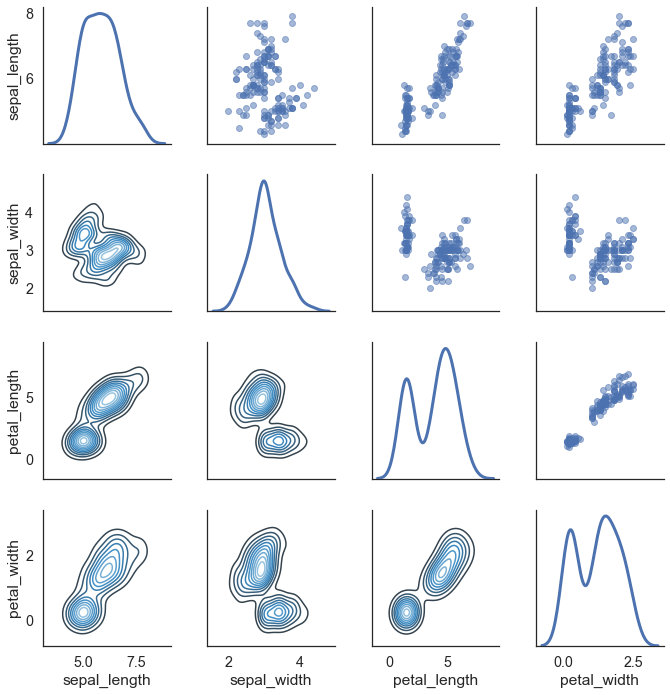

In [5]:
sns.set(style='white', font_scale=1.3)

df = sns.load_dataset('iris')

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter, alpha=0.5)
g.map_diag(sns.kdeplot, lw=3);

Зададим классы с помощью параметра `hue`

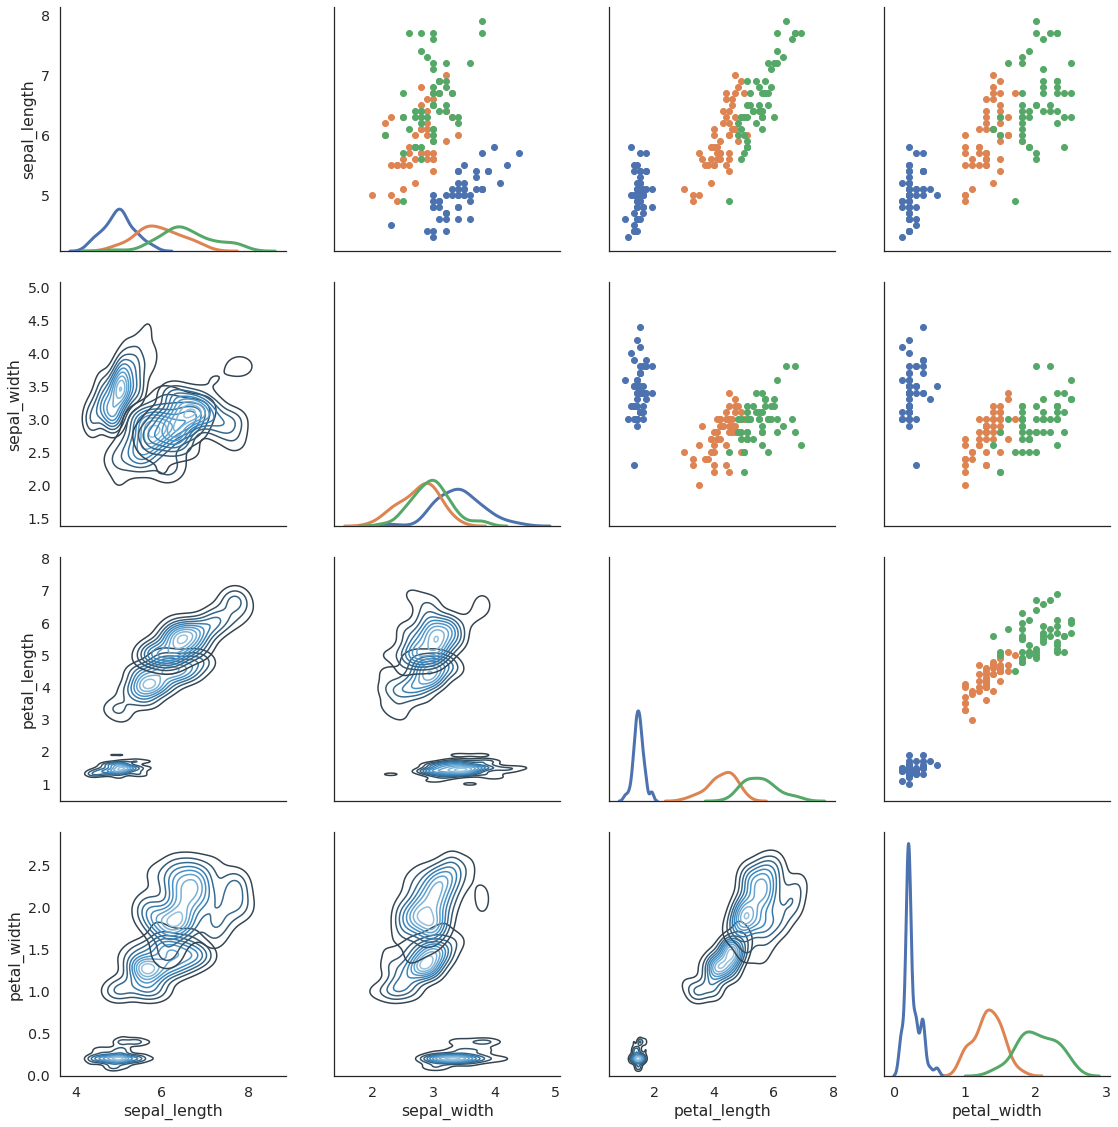

In [105]:
g = sns.PairGrid(df, hue='species', height=4)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

## 6. Heatmap

Визуализирует двумерную таблицу в виде тепловой карты.

`sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)`

* `data` -- 2D-данные;
* `vmin` и `vmax` -- минимальное и максимальное значения цветов;
* `cmap` -- цветовая схема;
* `robust` -- если не указханы `vmin` и `vmax`, то не используются выбросы при определении минимума и максимума;
* `annot` -- в какие ячейки записывать данные;
* `fmt` -- формат записи данных;
* `linewidths` -- ширина линий между ячейками;
* `linecolor` -- цвет линий между ячейками;
* `cbar` -- рисовать ли colorbar.

--------

Для примера загрузим данные о количестве пассажиров самолетов за каждый месяц с 1949 по 1960 года.

In [77]:
flights_long = sns.load_dataset('flights')
flights_long.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

Двумерную таблицу меяц-год создадим с помощью `pivot_table`

In [78]:
flights = flights_long.pivot_table(index='month', 
                                   columns='year', 
                                   values='passengers')
flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

Визуализируем ее с помощью `heatmap`, что более наглядно, чем просто смотреть на числа в таблице выше.

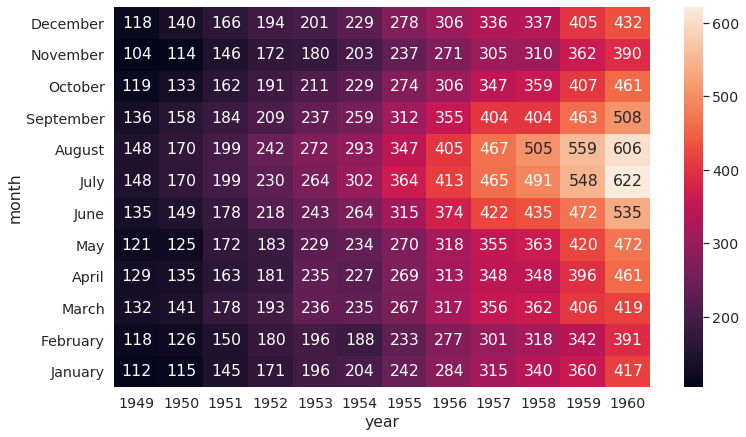

In [143]:
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(flights, annot=True, fmt='d', ax=ax)
plt.ylim((0, 12));

## 7. Jointplot

График двух переменных, соеднияющий функции 1D и 2D графиков.

`sns.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)`

* `x`, `y` -- данные или имена переменных в `data`;
* `data` -- данные;
* `kind` : { `"scatter"` | `"reg"` | `"resid"` | `"kde"` | `"hex"` } -- тип графика (точки, регрессия, остатки регрессии, ядерная оценка плотности, гексаэдры);
* `stat_func` -- функция-критерий, который возвращает статистику и pvalue. По умолчанию критерий для проверки некоррелированности на основе коэффициента корреляции Пирсона;
* `color` -- цвет;
* `height` -- размер фигуры;
* `dropna` -- удаление пропущенных значений;
* `xlim`, `ylim` -- ограничения по осям.

----------------

Сгенерируем выборку из двумерного нормального распределения

In [126]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=200).T

Визуализируем двумерную оценку плотности и две одномерных

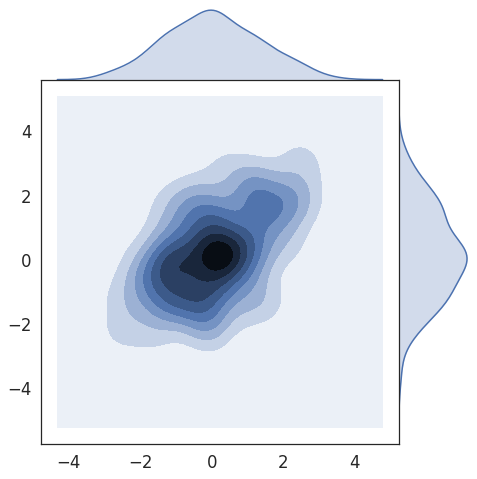

In [128]:
sns.set(style='white', font_scale=1.5)
sns.jointplot(x, y, kind='kde', height=7, space=0);

Если не указать тип визуализации, то будут нарисованы точки и гистограммы

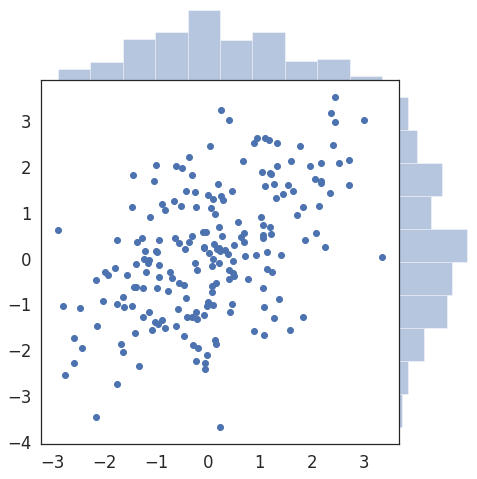

In [129]:
sns.jointplot(x, y, height=7, space=0);

## Бонус

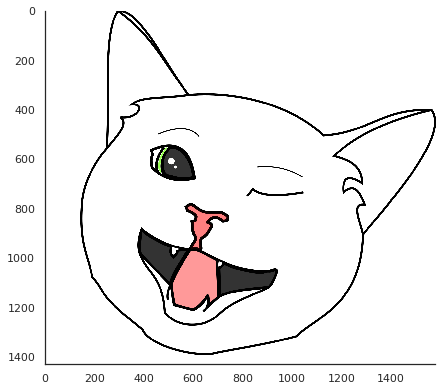

In [41]:
plt.figure(figsize=(7, 7))
plt.imshow(plt.imread('./pic.png'))
sns.despine();

-----

Статистика, прикладной поток 2019

Никита Волков

https://mipt-stats.gitlab.io/

Больше примеров https://seaborn.pydata.org/examples/